In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from scipy.integrate import quad
from advection import *
from scatter_plot_1 import *
from scatter_plot_2 import *
plt.style.use('seaborn')

importing Jupyter notebook from advection.ipynb
importing Jupyter notebook from scatter_plot_1.ipynb
importing Jupyter notebook from scatter_plot_2.ipynb


# Question 1

In [2]:
# Define parameters etc.

speed = np.sqrt(2)               # advection speed
dx = 0.025              # step size in space
dt = 0.01              # step size in time

x_min = -6
x_max = +6
t_max = 5

x = np.arange(x_min, x_max+dx, dx)
t = np.arange(0, t_max+dt, dt)

#eigensystem
lambda1 = -speed
v1 = np.array([[-speed], [1]])

lambda2 = speed
v2 = np.array([[speed], [1]])

C = np.column_stack((v1, v2))
Cinv = np.linalg.inv(C)

#initial conditions

def initial_condition(x):
    return np.maximum(1 - np.abs(x), 0)

def initial_condition_d(x):
    return np.where((x > 0) & (x < 1), -1, np.where((x > -1) & (x <= 0), +1, 0))

def initial_speed(x):
    return np.zeros_like(x)

#initial conditions for transformed system
def initial_new_1(x):
    return Cinv[0,0]*initial_speed(x) + Cinv[0,1]*initial_condition_d(x)
    
def initial_new_2(x):
    return Cinv[1,0]*initial_speed(x) + Cinv[1,1]*initial_condition_d(x)

#d’Alembert’s formula

def exact_sol(speed,x,t):

    # Define the lower and upper limit arrays
    lower_limit = x-speed*t
    upper_limit = x+speed*t
    
    integral = np.zeros_like(x)
    
    for i in range(len(x)):
        
        result, error = quad(initial_speed, lower_limit[i], upper_limit[i])
        integral[i] = result
    
    return 0.5*(initial_condition(x-speed*t) + initial_condition(x+speed*t)) + 1/(2*speed)*integral

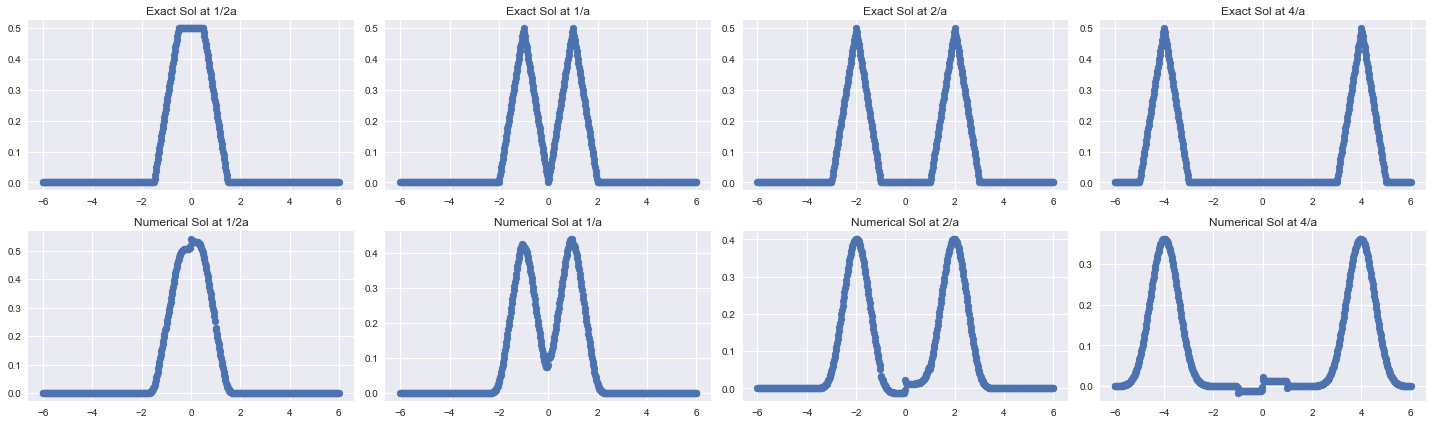

In [3]:
#METHOD: Lax-Friedrichs
method = 2
xi = advection(x_min, x_max, -lambda1, initial_new_1, t_max, dx, dt, method)
eta = advection(x_min, x_max, -lambda2, initial_new_2, t_max, dx, dt, method)

ut = C[0,0]*xi + C[0,1]*eta

#numerical solution
u = np.zeros([len(t), len(x)])
u[0] = initial_condition(x)  

for i in range(len(t)-1):
    
    u[i+1] = u[i] + dt/2*( ut[i+1] + ut[i] )

# plot the scatter plots on each subplot

scatter_plot_1(x,u,exact_sol,speed,dt)

# show the figure
plt.tight_layout()
plt.show()

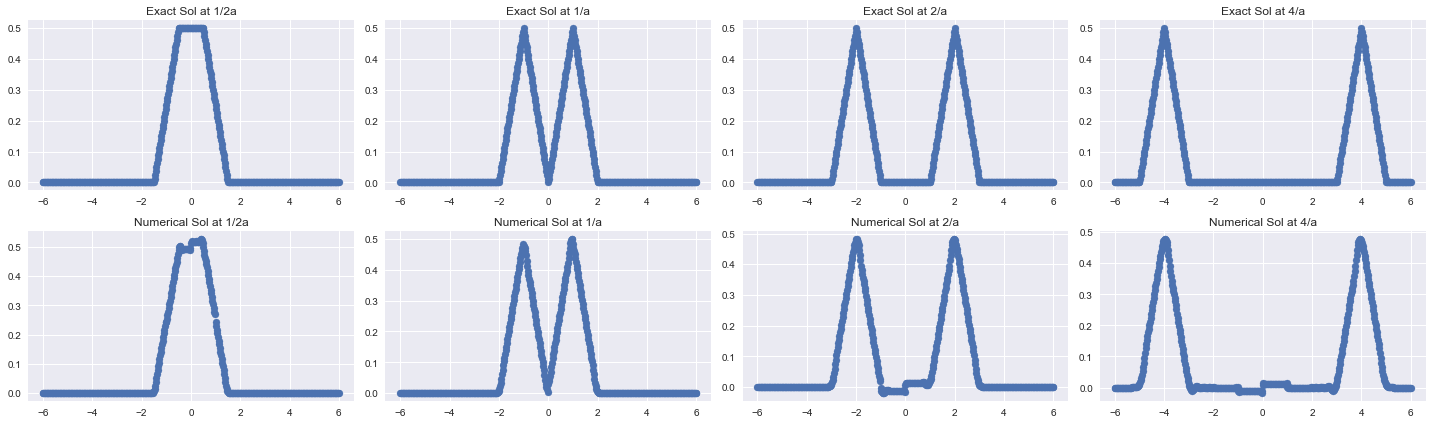

In [4]:
#METHOD: Lax-Wendroff
method = 5
xi = advection(x_min, x_max, -lambda1, initial_new_1, t_max, dx, dt, method)
eta = advection(x_min, x_max, -lambda2, initial_new_2, t_max, dx, dt, method)

ut = C[0,0]*xi + C[0,1]*eta

#numerical solution
u = np.zeros([len(t), len(x)])
u[0] = initial_condition(x)  

for i in range(len(t)-1):
    
    u[i+1] = u[i] + dt/2*( ut[i+1] + ut[i] )

# plot the scatter plots on each subplot

scatter_plot_1(x,u,exact_sol,speed,dt)

# show the figure
plt.tight_layout()
plt.show()

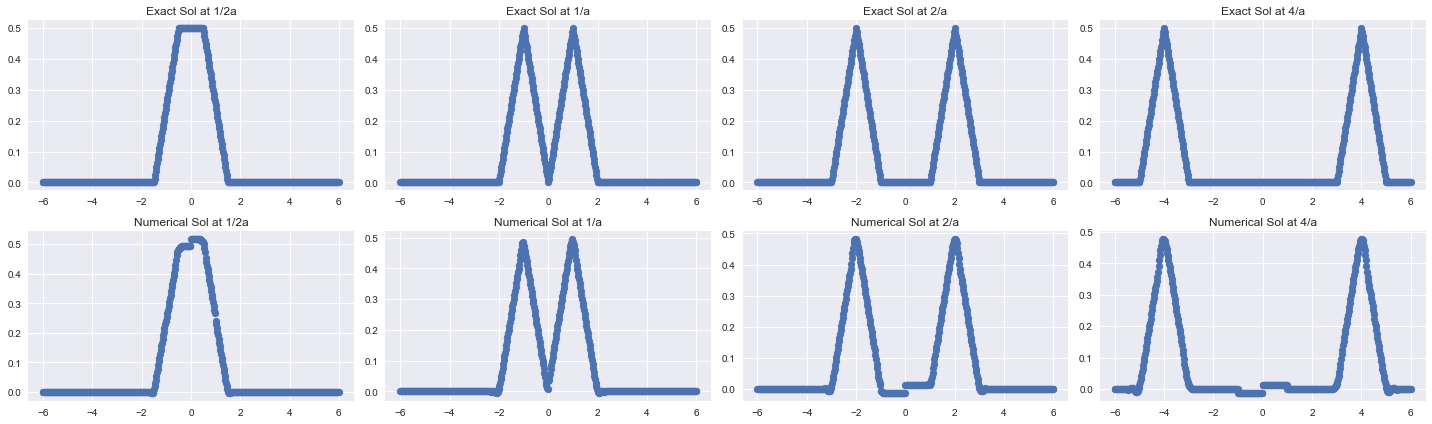

In [5]:
#METHOD: Upwind
method = 6
xi = advection(x_min, x_max, -lambda1, initial_new_1, t_max, dx, dt, method)
method = 7
eta = advection(x_min, x_max, -lambda2, initial_new_2, t_max, dx, dt, method)

ut = C[0,0]*xi + C[0,1]*eta

#numerical solution
u = np.zeros([len(t), len(x)])
u[0] = initial_condition(x)  

for i in range(len(t)-1):
    
    u[i+1] = u[i] + dt/2*( ut[i+1] + ut[i] )

# plot the scatter plots on each subplot

scatter_plot_1(x,u,exact_sol,speed,dt)

# show the figure
plt.tight_layout()
plt.show()

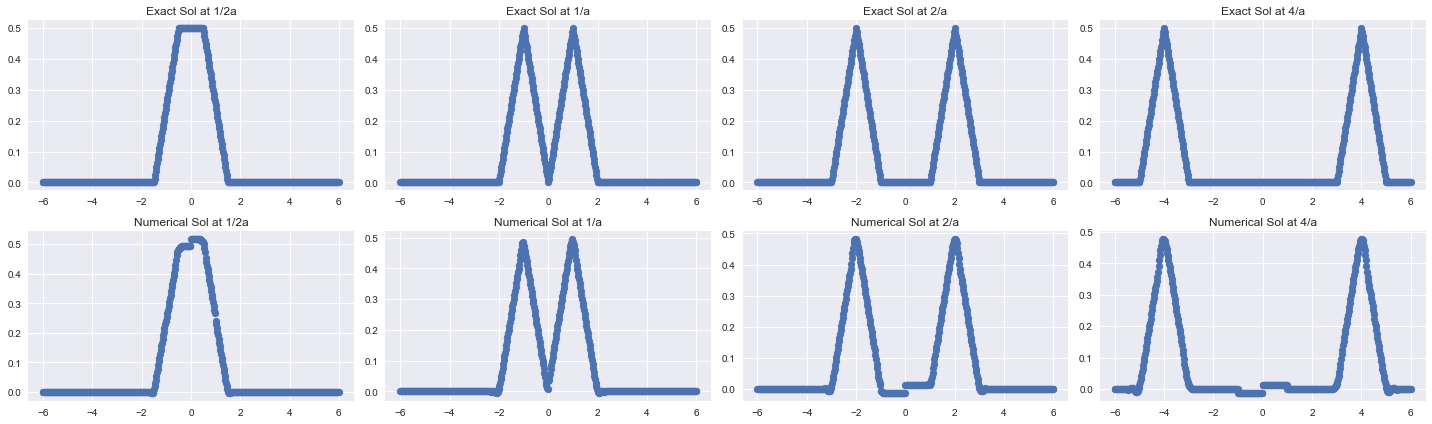

In [6]:
#METHOD: Beam-Warming
method = 6
xi = advection(x_min, x_max, -lambda1, initial_new_1, t_max, dx, dt, method)
method = 7
eta = advection(x_min, x_max, -lambda2, initial_new_2, t_max, dx, dt, method)

ut = C[0,0]*xi + C[0,1]*eta

#numerical solution
u = np.zeros([len(t), len(x)])
u[0] = initial_condition(x)  

for i in range(len(t)-1):
    
    u[i+1] = u[i] + dt/2*( ut[i+1] + ut[i] )

# plot the scatter plots on each subplot

scatter_plot_1(x,u,exact_sol,speed,dt)

# show the figure
plt.tight_layout()
plt.show()

# Question 2

In [9]:
# Define parameters etc.

speed = np.sqrt(2)     # advection speed
dx = 0.05          #step size in space
dt = 0.01          #step size in time

x_min = -5
x_max = +5
t_max = 40

x = np.arange(x_min, x_max+h, h)
t = np.arange(0, t_max+k, k)

#initial condition

def phi(x):
    return np.maximum(1 - np.abs(x), 0)

#exact solution

def u(a,x,t):
    return np.maximum(1 - np.abs(x-a*t), 0)

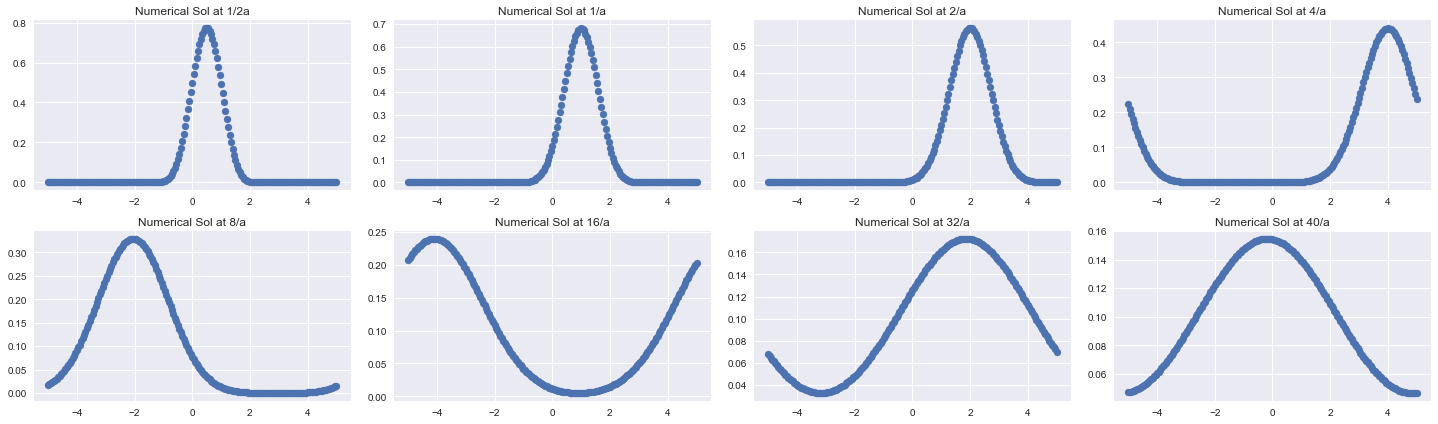

In [10]:
#METHOD: Lax-Friedrichs
method = 2
u = advection(x_min, x_max, speed, phi, t_max, dx, dt, method)

scatter_plot_2(x,u,speed,dt)

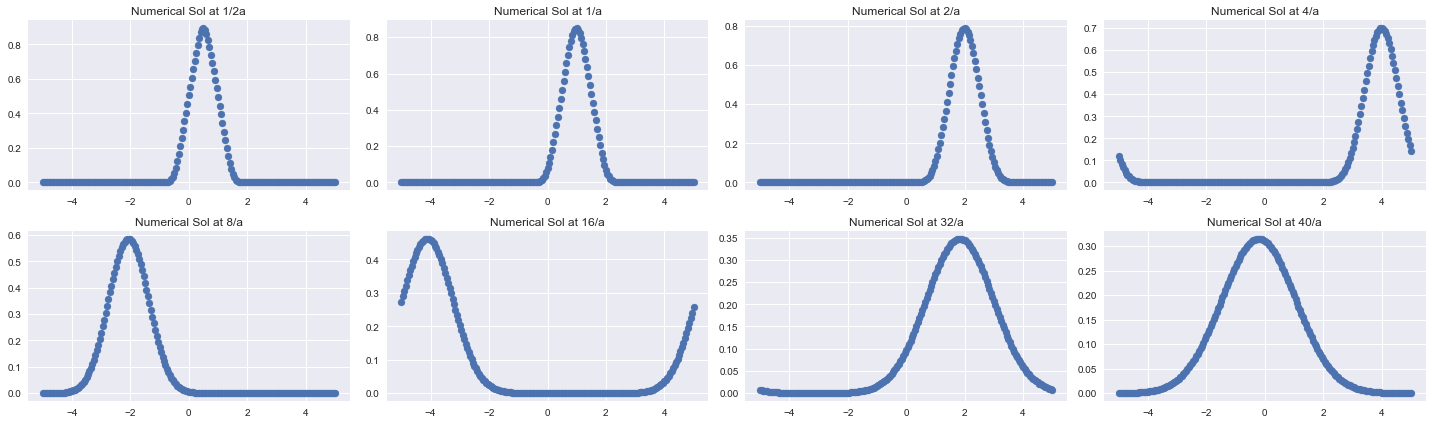

In [11]:
#METHOD: Upwind
method = 3
u = advection(x_min, x_max, speed, phi, t_max, dx, dt, method)

scatter_plot_2(x,u,speed,dt)

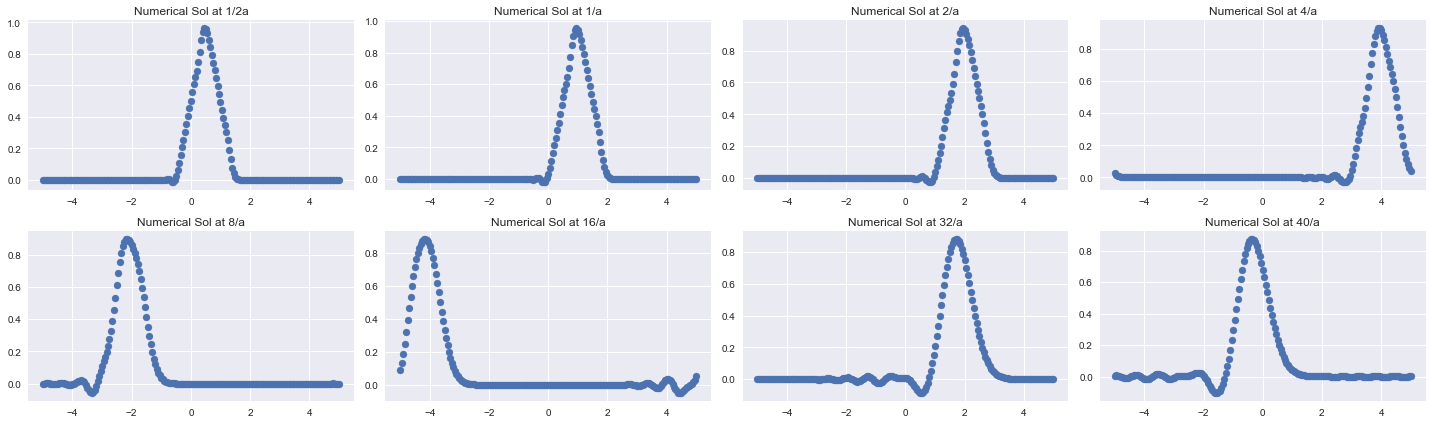

In [12]:
#METHOD: Lax-Wendroff
method = 5
u = advection(x_min, x_max, a, phi, t_max, dx, dt, method)

scatter_plot_2(x,u,speed,dt)

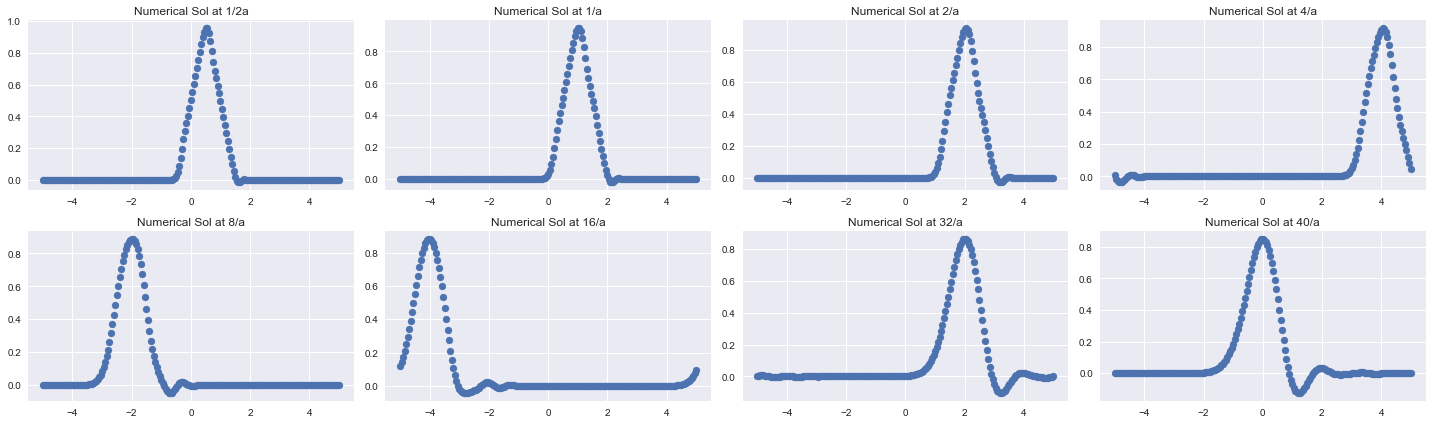

In [13]:
#METHOD: beam-warming
method = 6
u = advection(x_min, x_max, a, phi, t_max, dx, dt, method)

scatter_plot_2(x,u,speed,dt)

In [ ]:
#METHOD: leap frog
#method = 8
#u = advection(x_min, x_max, a, phi, t_max, h, k, method)

#scatter_plot_2(x,u,speed,dt)